In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("prosperLoanData.csv")

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.isnull().sum()


ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


<AxesSubplot: >

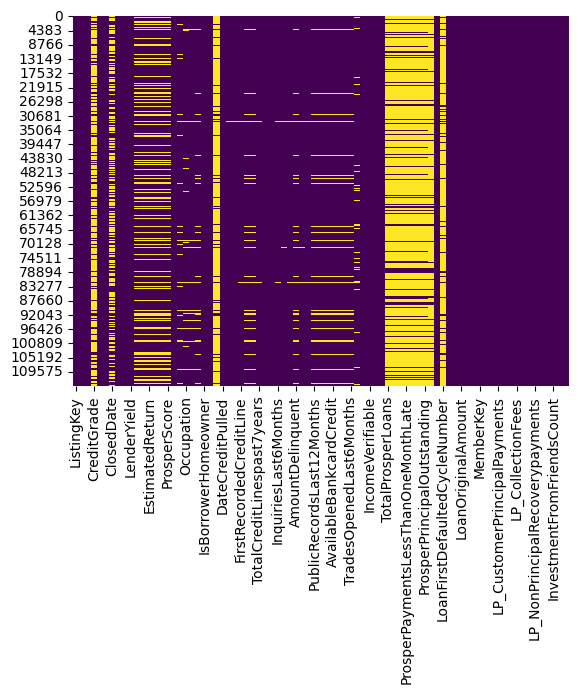

In [7]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [8]:
#checking the captalization
df['LoanStatus'].value_counts(dropna=False)

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [9]:
categorys=df.select_dtypes("object")

categorys

,ListingKey,ListingCreationDate,CreditGrade,LoanStatus,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,C,Completed,2009-08-14 00:00:00,NaN,CO,Other,Self-employed,NaN,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,NaN,Current,NaN,A,CO,Professional,Employed,NaN,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,HR,Completed,2009-12-17 00:00:00,NaN,GA,Other,Not available,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,NaN,Current,NaN,A,GA,Skilled Labor,Employed,NaN,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,NaN,Current,NaN,D,MN,Executive,Employed,NaN,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,2013-04-14 05:55:02.663000000,NaN,Current,NaN,C,IL,Food Service Management,Employed,NaN,2013-04-14 05:54:58,1997-09-01 00:00:00,"$50,000-74,999",9BD7367919051593140DB62,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15
113933,E6DB353036033497292EE43,2011-11-03 20:42:55.333000000,NaN,FinalPaymentInProgress,NaN,A,PA,Professional,Employed,NaN,2011-11-03 20:42:53,1992-01-17 00:00:00,"$75,000-99,999",62D93634569816897D5A276,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC
113934,E6E13596170052029692BB1,2013-12-13 05:49:12.703000000,NaN,Current,NaN,D,TX,Other,Employed,NaN,2013-12-13 05:49:15,2002-02-25 00:00:00,"$25,000-49,999",DD1A370200396006300ACA0,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5
113935,E6EB3531504622671970D9E,2011-11-14 13:18:26.597000000,NaN,Completed,2013-08-13 00:00:00,C,GA,Food Service,Full-time,NaN,2011-11-14 13:18:24,1993-12-01 00:00:00,"$25,000-49,999",589536350469116027ED11B,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8


In [10]:
categorys.columns

Index(['ListingKey', 'ListingCreationDate', 'CreditGrade', 'LoanStatus',
       'ClosedDate', 'ProsperRating (Alpha)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'GroupKey', 'DateCreditPulled',
       'FirstRecordedCreditLine', 'IncomeRange', 'LoanKey',
       'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey'],
      dtype='object')

In [11]:
categorys.isnull().sum()

ListingKey                      0
ListingCreationDate             0
CreditGrade                 84984
LoanStatus                      0
ClosedDate                  58848
ProsperRating (Alpha)       29084
BorrowerState                5515
Occupation                   3588
EmploymentStatus             2255
GroupKey                   100596
DateCreditPulled                0
FirstRecordedCreditLine       697
IncomeRange                     0
LoanKey                         0
LoanOriginationDate             0
LoanOriginationQuarter          0
MemberKey                       0
dtype: int64

In [12]:
categorys=categorys.fillna(categorys.mode().iloc[0])
categorys

,ListingKey,ListingCreationDate,CreditGrade,LoanStatus,ClosedDate,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,GroupKey,DateCreditPulled,FirstRecordedCreditLine,IncomeRange,LoanKey,LoanOriginationDate,LoanOriginationQuarter,MemberKey
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,C,Completed,2009-08-14 00:00:00,C,CO,Other,Self-employed,783C3371218786870A73D20,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00,"$25,000-49,999",E33A3400205839220442E84,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,C,Current,2014-03-04 00:00:00,A,CO,Professional,Employed,783C3371218786870A73D20,2014-02-27 08:28:14,1996-03-18 00:00:00,"$50,000-74,999",9E3B37071505919926B1D82,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,HR,Completed,2009-12-17 00:00:00,C,GA,Other,Not available,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00,Not displayed,6954337960046817851BCB2,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,C,Current,2014-03-04 00:00:00,A,GA,Skilled Labor,Employed,783C3371218786870A73D20,2012-10-22 11:02:32,1983-02-28 00:00:00,"$25,000-49,999",A0393664465886295619C51,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,C,Current,2014-03-04 00:00:00,D,MN,Executive,Employed,783C3371218786870A73D20,2013-09-14 18:38:44,2004-02-20 00:00:00,"$100,000+",A180369302188889200689E,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,2013-04-14 05:55:02.663000000,C,Current,2014-03-04 00:00:00,C,IL,Food Service Management,Employed,783C3371218786870A73D20,2013-04-14 05:54:58,1997-09-01 00:00:00,"$50,000-74,999",9BD7367919051593140DB62,2013-04-22 00:00:00,Q2 2013,2EC435768441332602FDC15
113933,E6DB353036033497292EE43,2011-11-03 20:42:55.333000000,C,FinalPaymentInProgress,2014-03-04 00:00:00,A,PA,Professional,Employed,783C3371218786870A73D20,2011-11-03 20:42:53,1992-01-17 00:00:00,"$75,000-99,999",62D93634569816897D5A276,2011-11-07 00:00:00,Q4 2011,55C4336679182766893E4FC
113934,E6E13596170052029692BB1,2013-12-13 05:49:12.703000000,C,Current,2014-03-04 00:00:00,D,TX,Other,Employed,783C3371218786870A73D20,2013-12-13 05:49:15,2002-02-25 00:00:00,"$25,000-49,999",DD1A370200396006300ACA0,2013-12-23 00:00:00,Q4 2013,0FE0370029359765342FDB5
113935,E6EB3531504622671970D9E,2011-11-14 13:18:26.597000000,C,Completed,2013-08-13 00:00:00,C,GA,Food Service,Full-time,783C3371218786870A73D20,2011-11-14 13:18:24,1993-12-01 00:00:00,"$25,000-49,999",589536350469116027ED11B,2011-11-21 00:00:00,Q4 2011,A33834861822272782621C8


In [13]:
categorys.isnull().sum()

ListingKey                 0
ListingCreationDate        0
CreditGrade                0
LoanStatus                 0
ClosedDate                 0
ProsperRating (Alpha)      0
BorrowerState              0
Occupation                 0
EmploymentStatus           0
GroupKey                   0
DateCreditPulled           0
FirstRecordedCreditLine    0
IncomeRange                0
LoanKey                    0
LoanOriginationDate        0
LoanOriginationQuarter     0
MemberKey                  0
dtype: int64

In [14]:
continuous=df.select_dtypes("number")
continuous

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,36,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [15]:
continuous.columns

Index(['ListingNumber', 'Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
       'EmploymentStatusDuration', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',

In [16]:
continuous.isnull().sum()

ListingNumber                   0
Term                            0
BorrowerAPR                    25
BorrowerRate                    0
LenderYield                     0
                               ..
PercentFunded                   0
Recommendations                 0
InvestmentFromFriendsCount      0
InvestmentFromFriendsAmount     0
Investors                       0
Length: 61, dtype: int64

In [17]:
continuous=continuous.fillna(continuous.median().iloc[0])
continuous

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,0.16516,0.1580,0.1380,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,36,0.28269,0.2750,0.2400,600554.00000,600554.0000,600554.00000,600554.0,600554.0,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,5.0,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,537216,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,8.0,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,1069178,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,3.0,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,539056,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,5.0,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [18]:
continuous.isnull().sum()

ListingNumber                  0
Term                           0
BorrowerAPR                    0
BorrowerRate                   0
LenderYield                    0
                              ..
PercentFunded                  0
Recommendations                0
InvestmentFromFriendsCount     0
InvestmentFromFriendsAmount    0
Investors                      0
Length: 61, dtype: int64

<AxesSubplot: xlabel='count', ylabel='LoanStatus'>

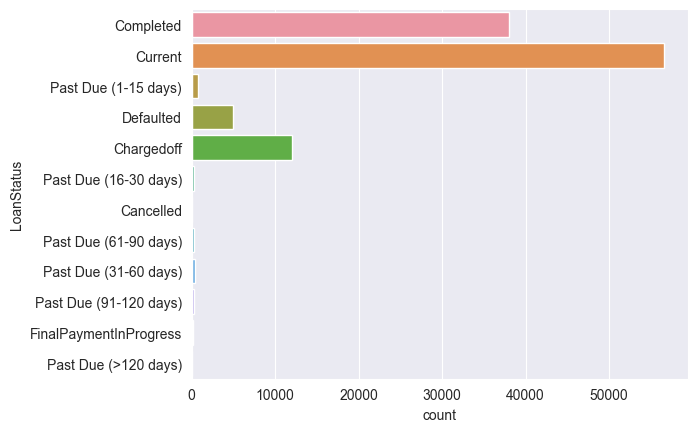

In [19]:
sns.set_style('darkgrid')
sns.countplot(y='LoanStatus',data=df)

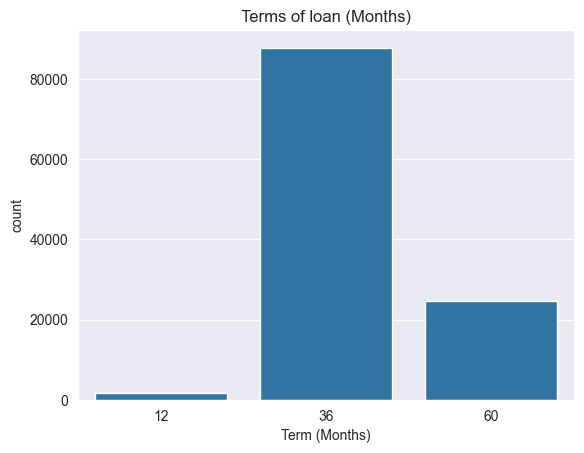

In [20]:
base_color = sns.color_palette()[0]
sns.countplot(data=df,x= 'Term',color=base_color);
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

Text(0.5, 0, 'Prosper Score')

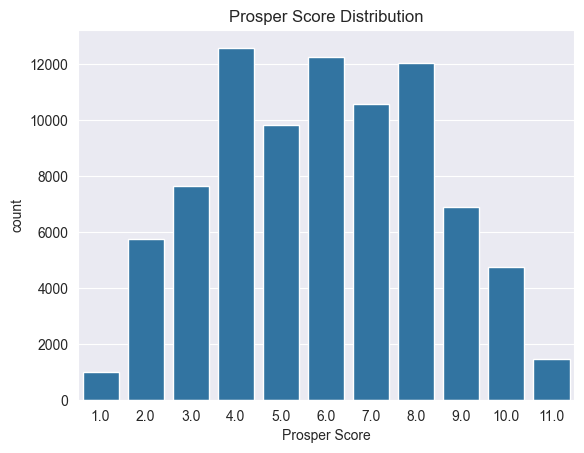

In [22]:
base_color = sns.color_palette()[0]
sns.countplot(data=df,x= 'ProsperScore',color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score')

Text(0.5, 1.0, 'Borrower State Distribution')

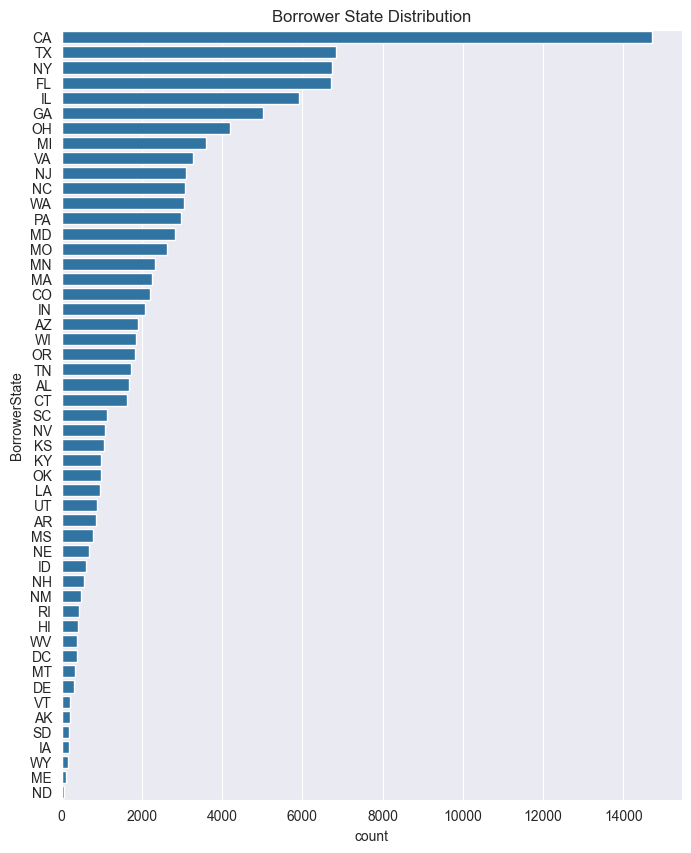

In [23]:
cat_order = df.BorrowerState.value_counts().index
plt.figure(figsize=[8, 10])
sns.countplot(data=df,y='BorrowerState',color=base_color, order=cat_order);
plt.title('Borrower State Distribution')

Text(0.5, 1.0, 'Borrower Occupation Distribution')

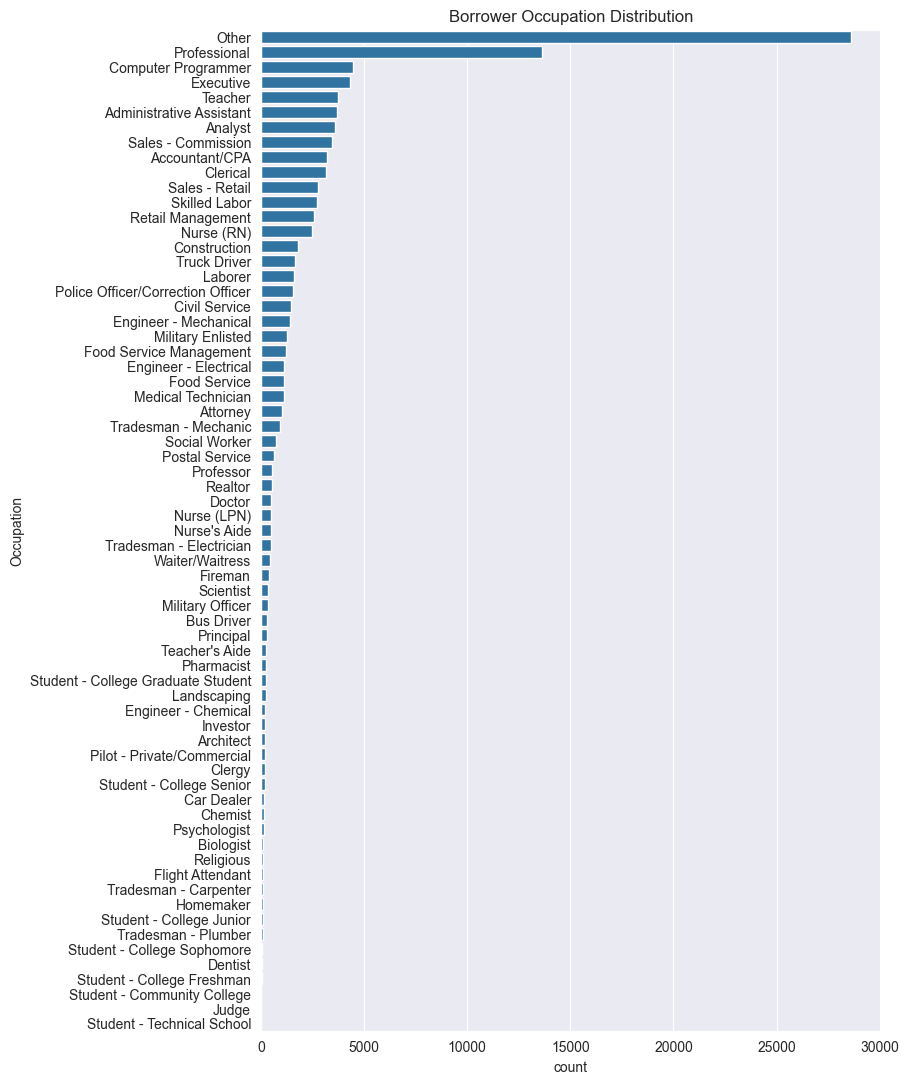

In [24]:
cat_order = df.Occupation.value_counts().index
plt.figure(figsize=[8, 13])
sns.countplot(data=df,y='Occupation',color=base_color, order=cat_order);
plt.title('Borrower Occupation Distribution')

Text(0.5, 1.0, 'BorrowerAPR & EmploymentStatus')

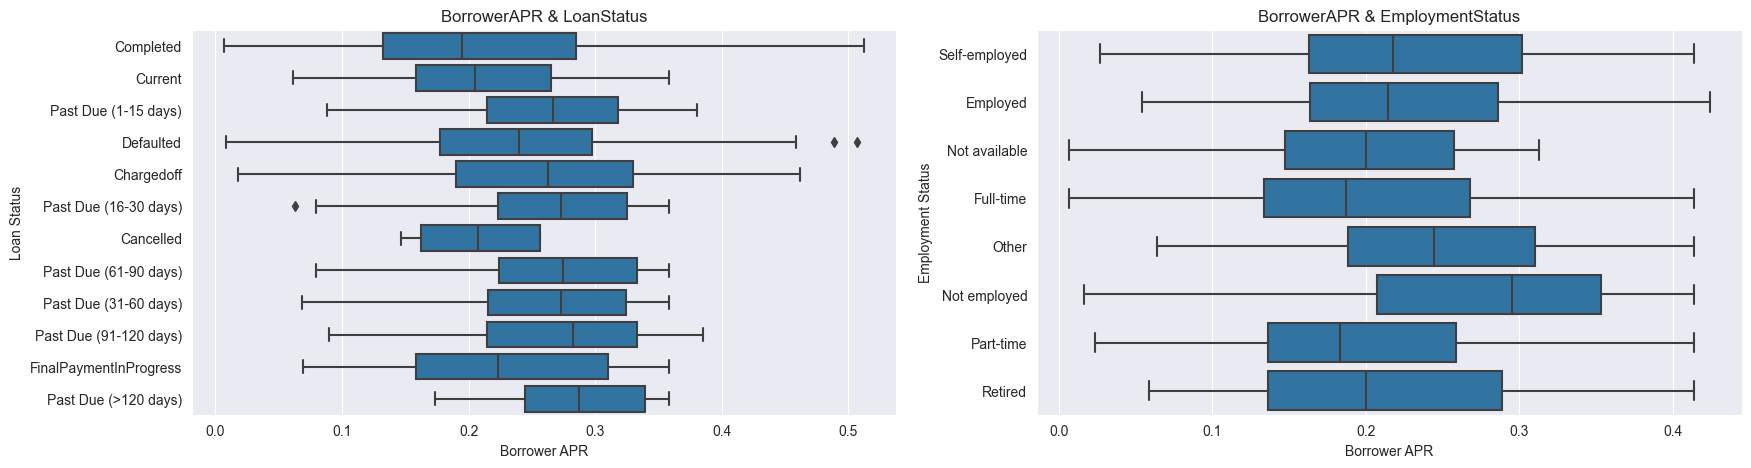

In [25]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sns.boxplot(data=df,x='BorrowerAPR',y='LoanStatus',color=base_color);
plt.xlabel('Borrower APR');
plt.ylabel('Loan Status');
plt.title('BorrowerAPR & LoanStatus');

plt.subplot(1, 2, 2)
sns.boxplot(data=df,x='BorrowerAPR',y='EmploymentStatus',color=base_color);
plt.xlabel('Borrower APR');
plt.ylabel('Employment Status');
plt.title('BorrowerAPR & EmploymentStatus')

In [26]:
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

In [27]:
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])

C:\Users\z_sal\AppData\Local\Temp\ipykernel_11848\1930109944.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BorrowerAPR'])


<AxesSubplot: xlabel='BorrowerAPR', ylabel='Density'>

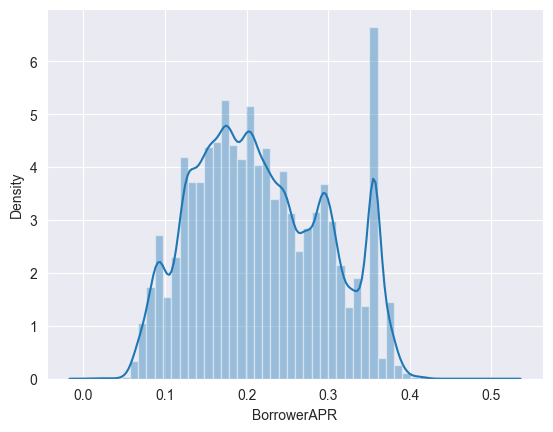

In [28]:
sns.distplot(df['BorrowerAPR']) 

In [32]:
df_loan = df.copy()

In [33]:
df_loan.drop(['ListingCreationDate','LoanOriginationDate','GroupKey','CreditGrade','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)',
        'TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ListingKey'], axis =1, inplace = True)
df_loan.head()

,ListingNumber,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,0,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,36,Current,NaN,0.12016,0.0920,0.0820,A,7.0,2,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,0,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,36,Current,NaN,0.12528,0.0974,0.0874,A,9.0,16,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,36,Current,NaN,0.24614,0.2085,0.1985,D,4.0,2,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [34]:
cols = ['ClosedDate','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','FirstRecordedCreditLine']


for i in cols:
    df_loan[i].fillna(df_loan[i].mode()[0], inplace=True)
    print(i)

ClosedDate
ProsperRating (Alpha)
BorrowerState
Occupation
EmploymentStatus
FirstRecordedCreditLine


In [36]:
cols =['BorrowerAPR','CreditScoreRangeLower','CreditScoreRangeUpper','ProsperScore','EmploymentStatusDuration','CurrentCreditLines','OpenCreditLines','TotalCreditLinespast7years','InquiriesLast6Months','TotalInquiries',
      'CurrentDelinquencies','AmountDelinquent','DelinquenciesLast7Years','PublicRecordsLast10Years','PublicRecordsLast12Months','RevolvingCreditBalance','BankcardUtilization','AvailableBankcardCredit','TotalTrades',
      'TradesNeverDelinquent (percentage)','TradesOpenedLast6Months','DebtToIncomeRatio','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber']


for i in cols:
    df_loan[i].fillna(df_loan[i].mean(), inplace=True)
    print(i)

BorrowerAPR
CreditScoreRangeLower
CreditScoreRangeUpper
ProsperScore
EmploymentStatusDuration
CurrentCreditLines
OpenCreditLines
TotalCreditLinespast7years
InquiriesLast6Months
TotalInquiries
CurrentDelinquencies
AmountDelinquent
DelinquenciesLast7Years
PublicRecordsLast10Years
PublicRecordsLast12Months
RevolvingCreditBalance
BankcardUtilization
AvailableBankcardCredit
TotalTrades
TradesNeverDelinquent (percentage)
TradesOpenedLast6Months
DebtToIncomeRatio
ScorexChangeAtTimeOfListing
LoanFirstDefaultedCycleNumber


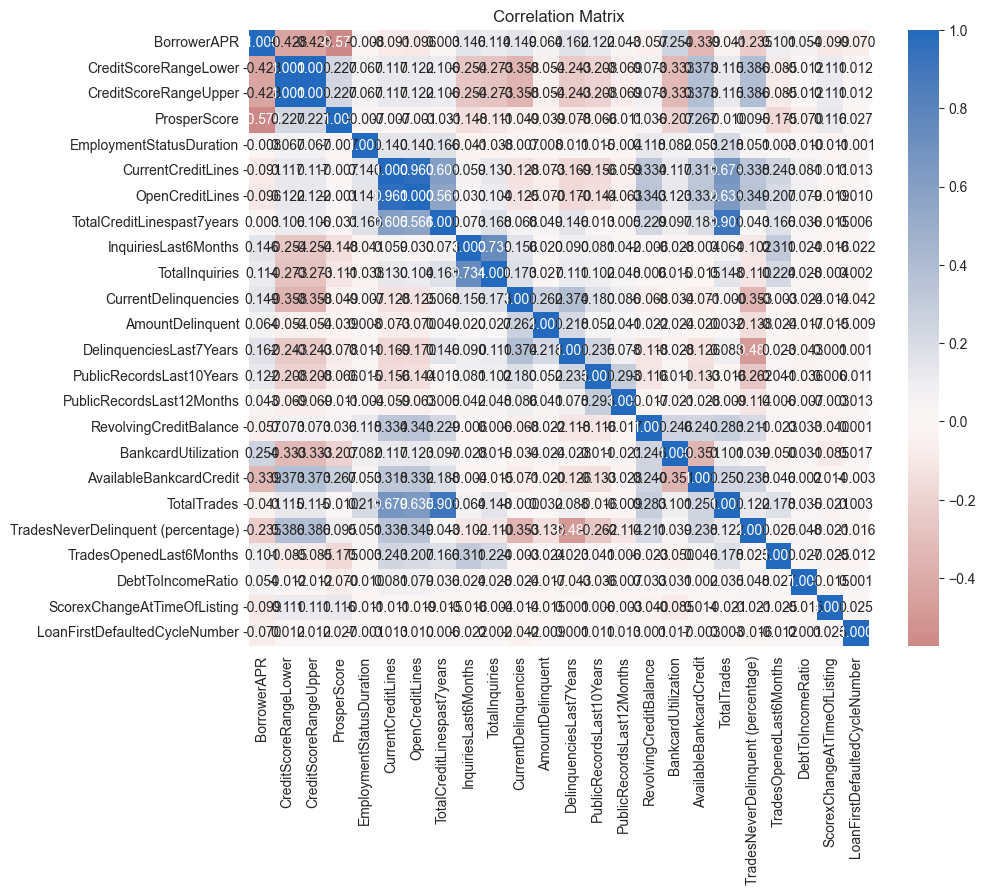

In [37]:
plt.figure(figsize = [10, 8])
sns.heatmap(df_loan[cols].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.margins(x = 0.5, y= 0.3)
plt.show()

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['ClosedDate','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','FirstRecordedCreditLine',
       'IsBorrowerHomeowner','CurrentlyInGroup','DateCreditPulled','IncomeRange','IncomeVerifiable','LoanKey','LoanOriginationQuarter',
       'MemberKey']

# Encode labels of multiple columns at once

df_loan[cols] = df_loan[cols].apply(LabelEncoder().fit_transform)

# Print head

df_loan.head()

,ListingNumber,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,Completed,1136,0.16516,0.1580,0.1380,3,5.950067,0,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,36,Current,2795,0.12016,0.0920,0.0820,0,7.000000,2,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,36,Completed,1261,0.28269,0.2750,0.2400,3,5.950067,0,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,36,Current,2795,0.12528,0.0974,0.0874,0,9.000000,16,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,36,Current,2795,0.24614,0.2085,0.1985,4,4.000000,2,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [39]:
X = df_loan.drop(columns='LoanStatus', axis=1)
Y = df_loan['LoanStatus']

In [40]:
X

,ListingNumber,Term,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,1136,0.16516,0.1580,0.1380,3,5.950067,0,5,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,36,2795,0.12016,0.0920,0.0820,0,7.000000,2,5,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,36,1261,0.28269,0.2750,0.2400,3,5.950067,0,10,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,36,2795,0.12528,0.0974,0.0874,0,9.000000,16,10,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,36,2795,0.24614,0.2085,0.1985,4,4.000000,2,23,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,2795,0.22354,0.1864,0.1764,3,5.000000,1,14,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,537216,36,2795,0.13220,0.1110,0.1010,0,8.000000,7,38,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,1069178,60,2795,0.23984,0.2150,0.2050,4,3.000000,1,43,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,539056,60,2592,0.28408,0.2605,0.2505,3,5.000000,2,10,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [41]:
Y

0                      Completed
1                        Current
2                      Completed
3                        Current
4                        Current
                   ...          
113932                   Current
113933    FinalPaymentInProgress
113934                   Current
113935                 Completed
113936                   Current
Name: LoanStatus, Length: 113937, dtype: object

In [42]:
df_loan1 = pd.get_dummies(df_loan['LoanStatus'])
print(df_loan1.head())

   Cancelled  Chargedoff  Completed  Current  Defaulted  \
0          0           0          1        0          0   
1          0           0          0        1          0   
2          0           0          1        0          0   
3          0           0          0        1          0   
4          0           0          0        1          0   

   FinalPaymentInProgress  Past Due (1-15 days)  Past Due (16-30 days)  \
0                       0                     0                      0   
1                       0                     0                      0   
2                       0                     0                      0   
3                       0                     0                      0   
4                       0                     0                      0   

   Past Due (31-60 days)  Past Due (61-90 days)  Past Due (91-120 days)  \
0                      0                      0                       0   
1                      0                      0   

In [43]:
df_loan2 = pd.concat((df_loan1, df_loan), axis=1)
df_loan2 = df_loan2.drop(["LoanStatus"], axis=1)
df_loan2 = df_loan2.drop(["Cancelled","Chargedoff","Current","Defaulted","FinalPaymentInProgress","FinalPaymentInProgress","Past Due (1-15 days)","Past Due (16-30 days)",
                              "Past Due (31-60 days)","Past Due (61-90 days)","Past Due (91-120 days)","Past Due (91-120 days)","Past Due (>120 days)"], axis=1)
data= df_loan2.rename(columns={"Completed": "LoanStatus"})
print(data)

        LoanStatus  ListingNumber  Term  ClosedDate  BorrowerAPR  \
0                1         193129    36        1136      0.16516   
1                0        1209647    36        2795      0.12016   
2                1          81716    36        1261      0.28269   
3                0         658116    36        2795      0.12528   
4                0         909464    36        2795      0.24614   
...            ...            ...   ...         ...          ...   
113932           0         753087    36        2795      0.22354   
113933           0         537216    36        2795      0.13220   
113934           0        1069178    60        2795      0.23984   
113935           1         539056    60        2592      0.28408   
113936           0        1140093    36        2795      0.13189   

        BorrowerRate  LenderYield  ProsperRating (Alpha)  ProsperScore  \
0             0.1580       0.1380                      3      5.950067   
1             0.0920       0.0820  

In [44]:
data

,LoanStatus,ListingNumber,Term,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1,193129,36,1136,0.16516,0.1580,0.1380,3,5.950067,0,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,0,1209647,36,2795,0.12016,0.0920,0.0820,0,7.000000,2,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,1,81716,36,1261,0.28269,0.2750,0.2400,3,5.950067,0,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0,658116,36,2795,0.12528,0.0974,0.0874,0,9.000000,16,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0,909464,36,2795,0.24614,0.2085,0.1985,4,4.000000,2,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,0,753087,36,2795,0.22354,0.1864,0.1764,3,5.000000,1,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,0,537216,36,2795,0.13220,0.1110,0.1010,0,8.000000,7,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,0,1069178,60,2795,0.23984,0.2150,0.2050,4,3.000000,1,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,1,539056,60,2592,0.28408,0.2605,0.2505,3,5.000000,2,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [45]:
X = data.drop(columns='LoanStatus', axis=1)
Y = data['LoanStatus']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=100)

In [47]:
print(X.shape, X_train.shape, X_test.shape)

(113937, 64) (91149, 64) (22788, 64)


In [48]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

array([2.02481044e-01, 5.32623961e-02, 3.84239675e-01, 2.09442296e-01,
       1.70293922e-01, 1.64660712e-01, 3.06509515e-02, 8.43420545e-02,
       5.30899106e-02, 1.09525021e-02, 9.24231531e-03, 9.34664685e-02,
       1.70216681e-02, 5.19033705e-03, 1.34882237e-02, 2.01946732e-01,
       2.11608894e-02, 2.01792757e-02, 1.13290467e-02, 1.46308603e-02,
       1.74524455e-02, 7.76541751e-03, 7.92319289e-03, 1.95754076e-02,
       6.53647262e-03, 7.17043172e-03, 5.19702909e-04, 8.12865558e-03,
       6.54610403e-04, 1.90782986e-03, 9.61924361e-03, 1.69252505e-02,
       2.09841102e-02, 1.54572202e-02, 1.65281944e-02, 1.35341238e-02,
       1.06832550e-02, 1.11804743e-02, 1.73371598e-02, 1.21342864e-02,
       6.07998464e-03, 2.81374902e-03, 1.23591157e-02, 7.46496616e-02,
       7.65819507e-02, 2.01260921e-01, 2.01712184e-01, 6.23017217e-02,
       2.02087720e-01, 1.76315832e-02, 1.39689879e-01, 2.38425555e-01,
       5.58431465e-01, 7.65536826e-02, 7.58431297e-02, 7.20624094e-03,
      

In [49]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

LP_CustomerPrincipalPayments    0.558431
ClosedDate                      0.384240
LP_CustomerPayments             0.238426
BorrowerAPR                     0.209442
ListingNumber                   0.202481
                                  ...   
IsBorrowerHomeowner             0.005190
LoanKey                         0.002814
PublicRecordsLast10Years        0.001908
DelinquenciesLast7Years         0.000655
CurrentDelinquencies            0.000520
Length: 64, dtype: float64